In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

In [4]:
def read_data():
    df = pd.read_excel(os.path.join('..',settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [5]:
df = read_data()

In [6]:
model = sort_important_features(df)

feature: posemo_4q, importance: 0.0722604002139883
feature: money, importance: 0.06439158537884462
feature: negemo_change_q, importance: 0.06368683194393215
feature: focuspresent, importance: 0.042618514017937134
feature: i, importance: 0.04062947963975214
feature: quant, importance: 0.03471082330121349
feature: anger_1h, importance: 0.030676374591546728
feature: anger_1q, importance: 0.030387519969031655
feature: bio, importance: 0.02811449926808065
feature: certain, importance: 0.025937679800033427
feature: risk, importance: 0.0249364665476922
feature: ipron, importance: 0.021803851346518327
feature: posemo_change_h, importance: 0.021230446702725152
feature: focusfuture, importance: 0.02097792754055046
feature: negate, importance: 0.01928315072152602
feature: discrep, importance: 0.0190607398841156
feature: relig, importance: 0.01841273628462161
feature: cogproc, importance: 0.016947777938306784
feature: article, importance: 0.015275097526464962
feature: cause, importance: 0.01478759

In [7]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [8]:
print_tree(model)

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor


def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    
    plt.figure(figsize=(30,60))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [10]:
rf, importances, names = sort_important_features(df)

feature: money, importance: 0.06300503835611662
feature: risk, importance: 0.03818128963859878
feature: focuspresent, importance: 0.03509163414762011
feature: posemo_change_q, importance: 0.031191339274662576
feature: posemo_change_h, importance: 0.030255541191992502
feature: i, importance: 0.028125852647608557
feature: function, importance: 0.02428262552131947
feature: Sixltr, importance: 0.021868162086213776
feature: certain, importance: 0.021350914114268933
feature: negate, importance: 0.017316778522225913
feature: quant, importance: 0.01708794906796127
feature: home, importance: 0.016915191834133158
feature: negemo_4q, importance: 0.014740055784442752
feature: ipron, importance: 0.013882795216056487
feature: anger_1q, importance: 0.01320982137930854
feature: family, importance: 0.013040142230919306
feature: article, importance: 0.012842218847097506
feature: anx_4q, importance: 0.012737682033892497
feature: social, importance: 0.0127197217702802
feature: leisure, importance: 0.01215

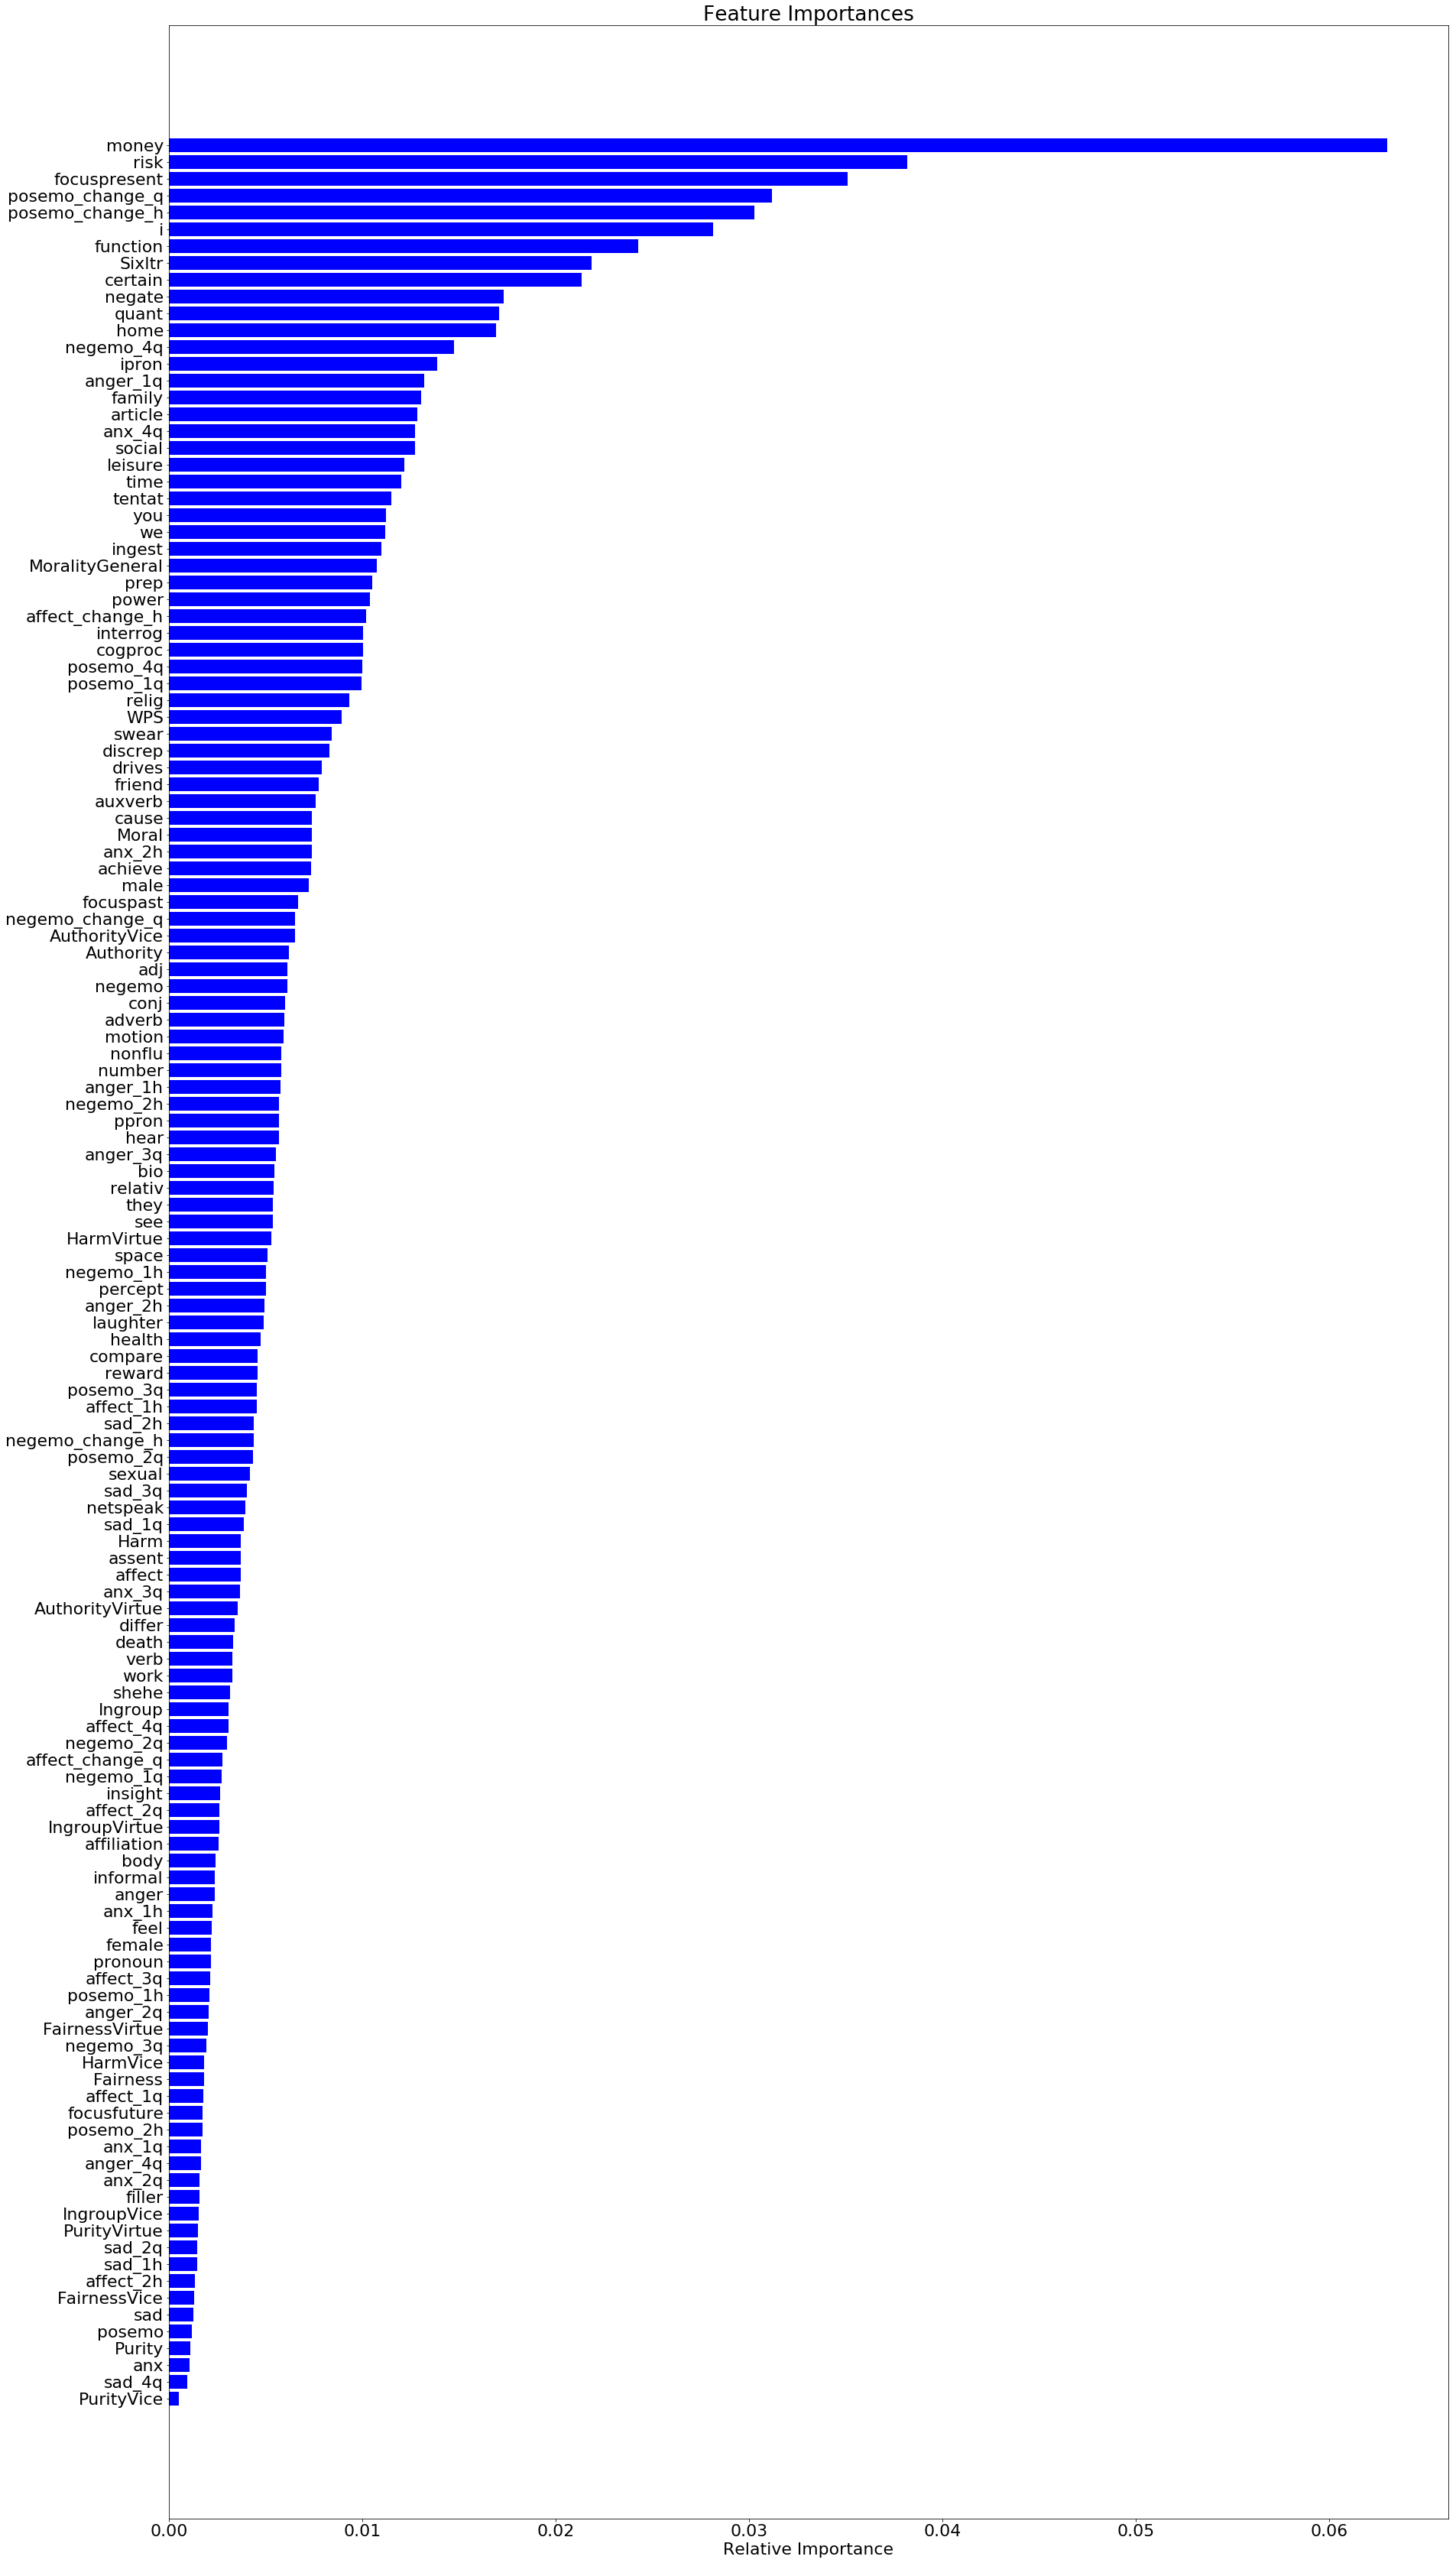

In [11]:
plot_feature_importances(df, importances, names)

## Create Linear Model Using Features with High Importance

In [12]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


def read_data():
    df = pd.read_excel(os.path.join('..',settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df



/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['i', 'negate','anx_1q','posemo_2q','interrog','negemo','risk', 'see', 'money', 'Moral', 'focuspresent', 'quant']
    lr.fit(df[predictors], df['norm_persuasive'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_persuasive'], X2)
    est2 = est.fit()
    print(est2.summary())

In [14]:
df = read_data()
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:        norm_persuasive   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     38.08
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           3.42e-82
Time:                        14:42:04   Log-Likelihood:                -15523.
No. Observations:                2406   AIC:                         3.107e+04
Df Residuals:                    2393   BIC:                         3.115e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -72.9167     22.698     -3.212   

## Create new affect variables per quarter by subtracting negative emotion from positive emotion

In [15]:
df['emotional_valence_1q'] = df['posemo_1q'] - df['negemo_1q']
df['emotional_valence_2q'] = df['posemo_2q'] - df['negemo_2q']
df['emotional_valence_3q'] = df['posemo_3q'] - df['negemo_3q']
df['emotional_valence_4q'] = df['posemo_4q'] - df['negemo_4q']


In [16]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [17]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['i', 'negate','anx_1q','posemo_2q','emotional_valence_4q','interrog','negemo','risk', 'see', 'money', 'Moral', 'focuspresent', 'quant']
    lr.fit(df[predictors], df['norm_persuasive'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_persuasive'], X2)
    est2 = est.fit()
    print(est2.summary())

In [18]:
df[['emotional_valence_1q','emotional_valence_2q','emotional_valence_3q','emotional_valence_4q']].describe()

,emotional_valence_1q,emotional_valence_2q,emotional_valence_3q,emotional_valence_4q
count,2406.000000,2406.000000,2406.000000,2406.000000
mean,1.012914,1.065910,1.184086,1.929501
std,1.712623,1.799567,1.682887,1.707021
min,-7.670000,-11.260000,-8.930000,-5.740000
25%,0.000000,0.120000,0.250000,0.880000
50%,1.015000,1.035000,1.170000,1.820000
75%,1.900000,1.997500,2.120000,2.850000
max,14.030000,25.000000,11.980000,12.500000


In [19]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:        norm_persuasive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     35.49
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           3.25e-82
Time:                        14:42:04   Log-Likelihood:                -15521.
No. Observations:                2406   AIC:                         3.107e+04
Df Residuals:                    2392   BIC:                         3.115e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -66.3726 

It seems that greater the difference between positive emotion and negative emotion in quarter four, the less the persuasive ratings.  It is important to keep posemo and negative emotion fairly close to each other to be persuasive.

## Create correlation matrix

In [21]:
df[['norm_persuasive','i', 'negate','interrog','negemo','risk', 'see', 'money', 'focuspresent', 'quant']].corr()

,norm_persuasive,i,negate,interrog,negemo,risk,see,money,focuspresent,quant
norm_persuasive,1.000000,-0.168692,0.154394,0.131411,0.157321,0.223466,-0.183122,0.187333,0.158301,0.135006
i,-0.168692,1.000000,0.286671,-0.008410,0.137456,-0.085797,-0.009167,-0.138521,-0.131174,-0.206862
negate,0.154394,0.286671,1.000000,0.183780,0.258132,0.186698,-0.187748,0.042376,0.227207,-0.057554
interrog,0.131411,-0.008410,0.183780,1.000000,0.043421,0.062313,-0.090925,0.026204,0.292677,0.018054
negemo,0.157321,0.137456,0.258132,0.043421,1.000000,0.520370,-0.235362,0.032679,-0.115978,-0.060906
risk,0.223466,-0.085797,0.186698,0.062313,0.520370,1.000000,-0.225843,0.166871,0.042547,0.035736
see,-0.183122,-0.009167,-0.187748,-0.090925,-0.235362,-0.225843,1.000000,-0.221305,0.034703,-0.066820
money,0.187333,-0.138521,0.042376,0.026204,0.032679,0.166871,-0.221305,1.000000,0.008120,0.168847
focuspresent,0.158301,-0.131174,0.227207,0.292677,-0.115978,0.042547,0.034703,0.008120,1.000000,0.144968
quant,0.135006,-0.206862,-0.057554,0.018054,-0.060906,0.035736,-0.066820,0.168847,0.144968,1.000000


In [22]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [23]:
calculate_pvalues(df[['norm_persuasive','i', 'negate','interrog','negemo','risk', 'see', 'money', 'focuspresent', 'quant']])

,norm_persuasive,i,negate,interrog,negemo,risk,see,money,focuspresent,quant
norm_persuasive,0,0,0,0,0,0,0,0,0,0
i,0,0,0,0.6801,0,0,0.6531,0,0,0
negate,0,0,0,0,0,0,0,0.0377,0,0.0047
interrog,0,0.6801,0,0,0.0332,0.0022,0,0.1988,0,0.3761
negemo,0,0,0,0.0332,0,0,0,0.109,0,0.0028
risk,0,0,0,0.0022,0,0,0,0,0.0369,0.0797
see,0,0.6531,0,0,0,0,0,0,0.0888,0.001
money,0,0,0.0377,0.1988,0.109,0,0,0,0.6906,0
focuspresent,0,0,0,0,0,0.0369,0.0888,0.6906,0,0
quant,0,0,0.0047,0.3761,0.0028,0.0797,0.001,0,0,0


In [24]:
df[['norm_persuasive','i', 'negate','interrog','negemo','risk', 'see', 'money', 'focuspresent', 'quant']].mean()

norm_persuasive    137.190942
i                    2.755216
negate               1.275474
interrog             1.957793
negemo               1.292872
risk                 0.496471
see                  1.235166
money                0.679505
focuspresent        11.184447
quant                2.394701
dtype: float64

In [25]:
df[['norm_persuasive','i', 'negate','interrog','negemo','risk', 'see', 'money', 'focuspresent', 'quant']].std()

norm_persuasive    167.388307
i                    2.142303
negate               0.547785
interrog             0.603040
negemo               0.862895
risk                 0.396364
see                  0.841339
money                0.875170
focuspresent         2.511998
quant                0.695338
dtype: float64